In [5]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("ComplexHeatmap")

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'ComplexHeatmap'

also installing the dependencies ‘shape’, ‘rjson’, ‘circlize’, ‘GetoptLong’, ‘clue’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'backports', 'BH', 'BiocManager', 'BiocParallel', 'bit', 'bit64',
  'boot', 'callr', 'caTools', 'class', 'cli', 'clipr', 'cluster', 'codetools',
  'covr', 'crayon', 'crosstalk', 'data.table', 'DBI', 'dbplyr', 'DelayedArray',
  'DeMixT', 'desc', 'devtools', 'digest', 'doParallel', 'dplyr', 'DT',
  'ellipse', 'ellipsis', 'fansi', 'farver', 'fastmap', 'foreach', 'formatR',
  'Formula', 'fs', 'GenomeInfoDb', 'ggfortify', 'ggplot2', 'gh', 'git2r',
  'glue', 'gplots', 'gtools', 'Hmisc', 'hms', 'htmlTable', 'htmltools',
  'htmlwidgets', 'httpuv', 'httr', 'igraph', 'IRanges', 'isoband', 'iterators',
  'jsonlite', 'KernSmooth', 'knitr', 'labeling', 'later', 'lattice',
  'lifecycle', 'lmtest', 'magrittr', 'MA

In [6]:
library(ComplexHeatmap)

Loading required package: grid

ComplexHeatmap version 2.2.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.




In [8]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: CentOS release 6.7 (Final)

Matrix products: default
BLAS/LAPACK: /home/Tianhao/Tools/anaconda3/envs/R36/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] ComplexHeatmap_2.2.0 devtools_2.2.1       usethis_1.5.1       

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.4.6        RColorBrewer_1.1-2  BiocManager_1.30.10
 [4] pillar_1.4.3        compiler_3.6.2      prettyunits_1.1.1  
 [7] base64enc_0.1-3     remotes_2

In [44]:
library(RColorBrewer)

In [42]:
mdata <- read.csv(file = 'Neutrophil_MeanExp_Norm')
rownames(mdata) <- mdata[,1]
mdata <- mdata[,2:5]

In [64]:
colnames(mdata) <- c(0,1,2,3)

In [58]:
mycol <- brewer.pal(11,'RdYlBu')

In [68]:
redgene <- read.csv('neut_red',header=F)
bluegene <- read.csv('neut_blue',header=F)

In [69]:
rlist = na.omit(unique(match(redgene[,1],rownames(mdata))))
blist = na.omit(unique(match(bluegene[,1],rownames(mdata))))

In [71]:
colorlist = c(rep(mycol[3],length(rlist)),rep(rev(mycol)[3],length(blist)))

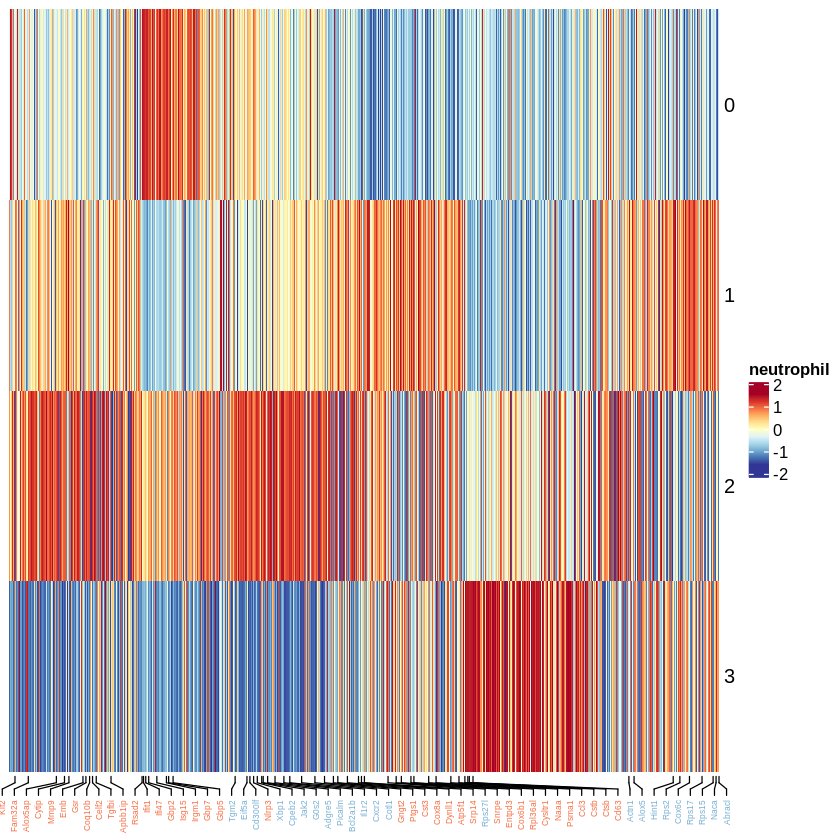

In [95]:
rlist = na.omit(unique(match(redgene[,1],rownames(mdata))))
blist = na.omit(unique(match(bluegene[,1],rownames(mdata))))
ha = columnAnnotation(foo = anno_mark(at = c(rlist,blist), labels = rownames(mdata)[c(rlist,blist)],
                                      side='bottom',labels_gp=gpar(col=colorlist,fontsize = 5)))
Heatmap(t(mdata),name='neutrophil', cluster_rows = FALSE, cluster_columns = FALSE,
        bottom_annotation=ha,show_column_names=FALSE,col=rev(mycol))

[1] 8.170491 4.191105

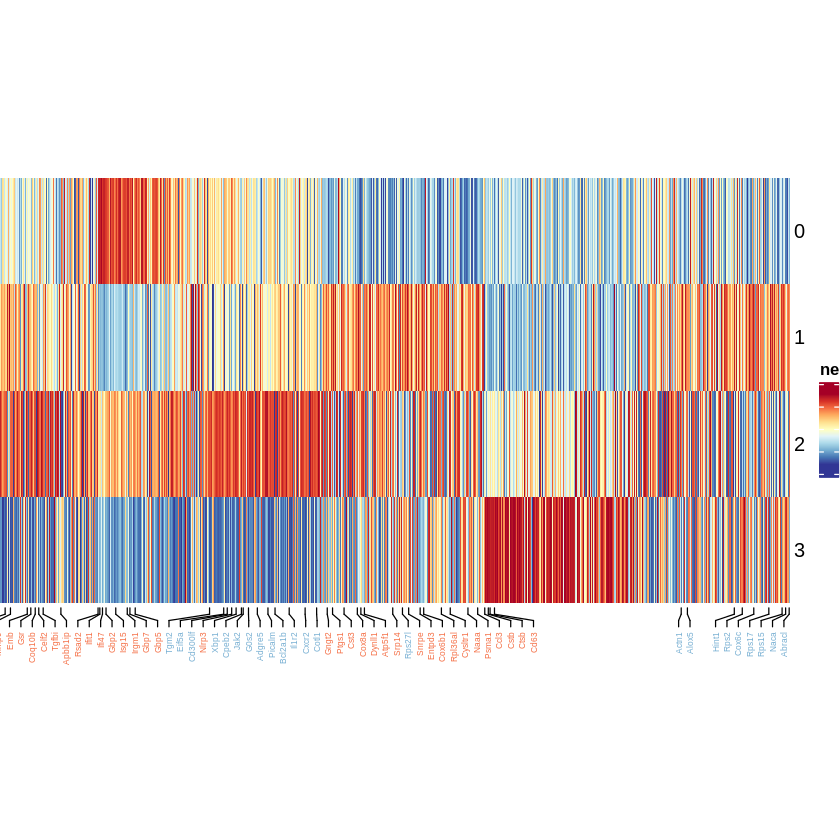

In [96]:
ht = Heatmap(t(mdata),name='neutrophil', cluster_rows = FALSE, cluster_columns = FALSE,
        bottom_annotation=ha,show_column_names=FALSE,col=rev(mycol),
        width = unit(18, "cm"), height = unit(9, "cm"))
ht = draw(ht)
w = ComplexHeatmap:::width(ht)
w = convertX(w, "inch", valueOnly = TRUE)
h = ComplexHeatmap:::height(ht)
h = convertY(h, "inch", valueOnly = TRUE)
c(w, h)

In [97]:
pdf('Neutrophil_heatmap.pdf', width = w, height = h)
Heatmap(t(mdata),name='neutrophil', cluster_rows = FALSE, cluster_columns = FALSE,
        bottom_annotation=ha,show_column_names=FALSE,col=rev(mycol),
        width = unit(18, "cm"), height = unit(9, "cm"))
dev.off()

png 
  2

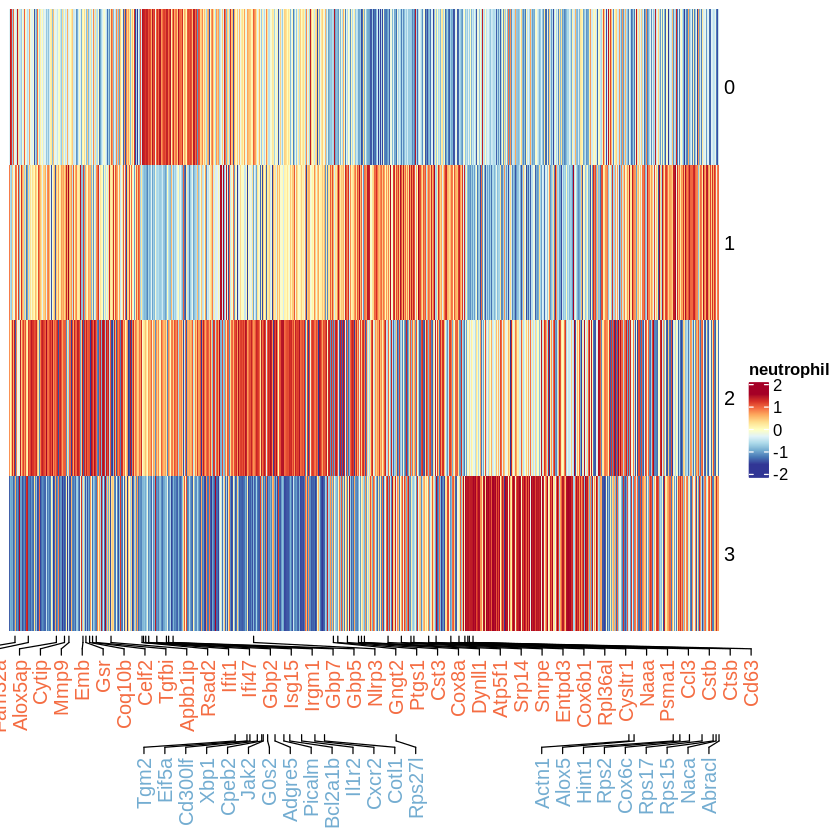

In [91]:
ha = columnAnnotation(foo = anno_mark(at = rlist, labels = rownames(mdata)[rlist],
                                      side='bottom',labels_gp=gpar(col=rep(mycol[3],length(rlist)))),
                    bar = anno_mark(at = blist, labels = rownames(mdata)[blist],
                                      side='bottom',labels_gp=gpar(col=rep(rev(mycol)[3],length(blist)))))
Heatmap(t(mdata),name='neutrophil', cluster_rows = FALSE, cluster_columns = FALSE,
        bottom_annotation=ha,show_column_names=FALSE,col=rev(mycol),
        )


[1] 8.170491 5.359695

png 
  2

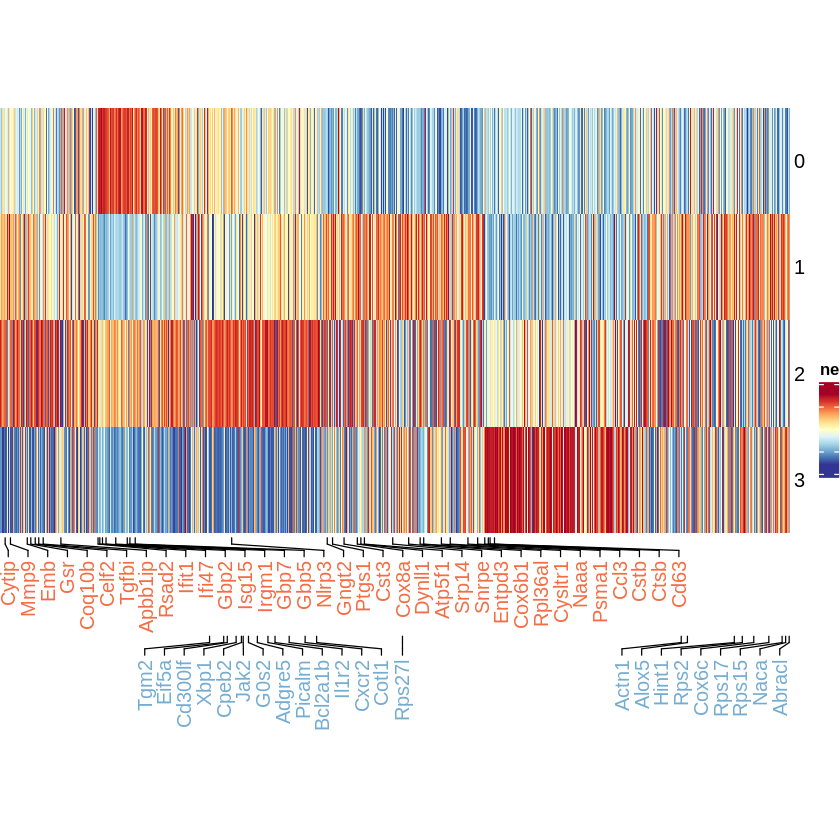

In [93]:
ht = Heatmap(t(mdata),name='neutrophil', cluster_rows = FALSE, cluster_columns = FALSE,
        bottom_annotation=ha,show_column_names=FALSE,col=rev(mycol),
        width = unit(18, "cm"), height = unit(9, "cm"))
ht = draw(ht)
w = ComplexHeatmap:::width(ht)
w = convertX(w, "inch", valueOnly = TRUE)
h = ComplexHeatmap:::height(ht)
h = convertY(h, "inch", valueOnly = TRUE)
c(w, h)
pdf('Neutrophil_heatmap_2layers.pdf', width = w, height = h)
Heatmap(t(mdata),name='neutrophil', cluster_rows = FALSE, cluster_columns = FALSE,
        bottom_annotation=ha,show_column_names=FALSE,col=rev(mycol),
        width = unit(18, "cm"), height = unit(9, "cm"))
dev.off()

In [99]:
mdata <- read.csv(file = 'DC-Mono-Mf_MeanExp_Norm')
rownames(mdata) <- mdata[,1]
mdata <- mdata[,2:5]
colnames(mdata) <- c(0,1,2,3)

In [100]:
redgene <- read.csv('mono_red',header=F)
bluegene <- read.csv('mono_blue',header=F)
rlist = na.omit(unique(match(redgene[,1],rownames(mdata))))
blist = na.omit(unique(match(bluegene[,1],rownames(mdata))))

In [101]:
colorlist = c(rep(mycol[3],length(rlist)),rep(rev(mycol)[3],length(blist)))

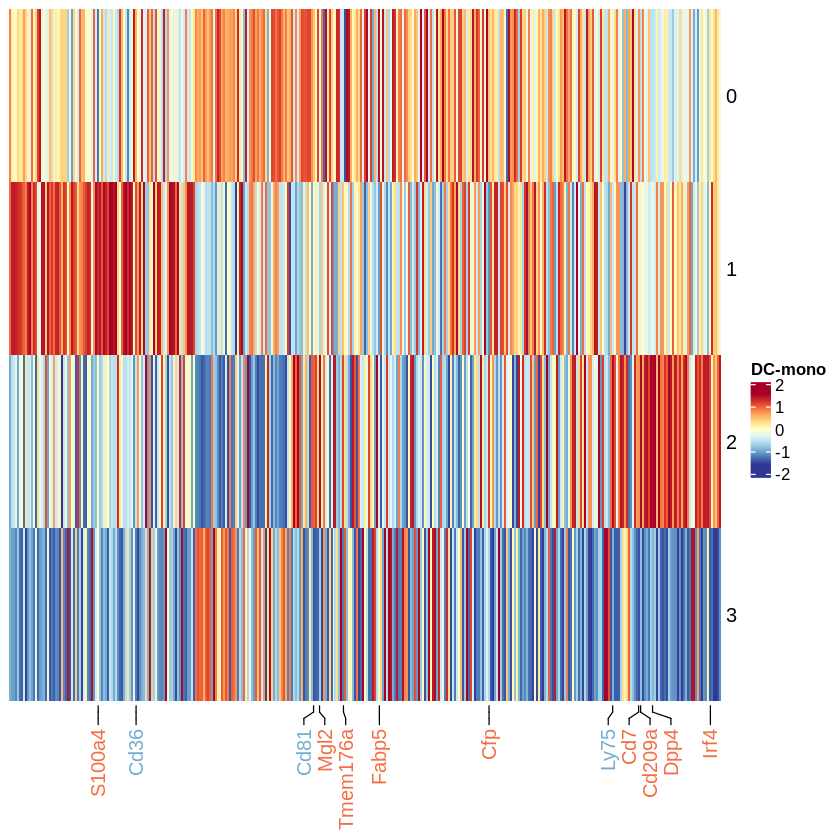

In [103]:
ha = columnAnnotation(foo = anno_mark(at = c(rlist,blist), labels = rownames(mdata)[c(rlist,blist)],
                                      side='bottom',labels_gp=gpar(col=colorlist)))
Heatmap(t(mdata),name='DC-mono', cluster_rows = FALSE, cluster_columns = FALSE,
        bottom_annotation=ha,show_column_names=FALSE,col=rev(mycol))

[1] 8.153964 4.779841

png 
  2

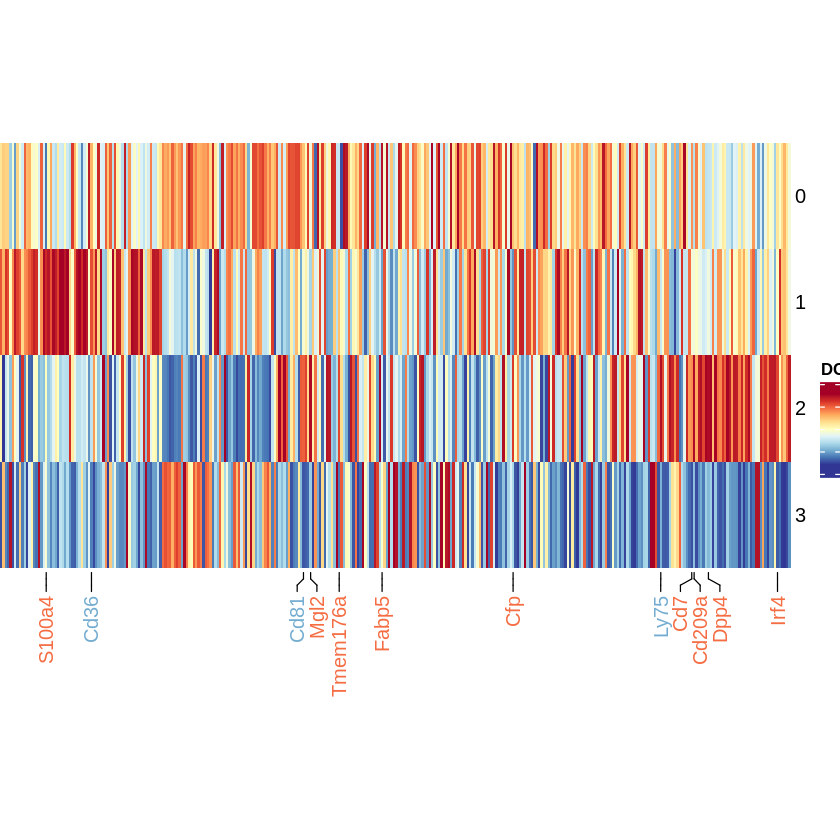

In [104]:
ht = Heatmap(t(mdata),name='DC-mono', cluster_rows = FALSE, cluster_columns = FALSE,
        bottom_annotation=ha,show_column_names=FALSE,col=rev(mycol),
        width = unit(18, "cm"), height = unit(9, "cm"))
ht = draw(ht)
w = ComplexHeatmap:::width(ht)
w = convertX(w, "inch", valueOnly = TRUE)
h = ComplexHeatmap:::height(ht)
h = convertY(h, "inch", valueOnly = TRUE)
c(w, h)
pdf('DCMono_heatmap.pdf', width = w, height = h)
Heatmap(t(mdata),name='DC-mono', cluster_rows = FALSE, cluster_columns = FALSE,
        bottom_annotation=ha,show_column_names=FALSE,col=rev(mycol),
        width = unit(18, "cm"), height = unit(9, "cm"))
dev.off()